# Binary Classification -Titanic-

Objective:

The goal is to build a machine learning model that can predict whether a passenger survived the Titanic disaster or not.

Dataset:

The dataset contains information about each passenger, including whether they survived (target variable) and various features such as ticket class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, ticket number, passenger fare, cabin number, and the port of embarkation.
Features:

Survival (Target Variable): 0 indicates No (did not survive), and 1 indicates Yes (survived).
Pclass (Ticket class): 1 = 1st class, 2 = 2nd class, 3 = 3rd class.
Sex: Male or Female.
Age: Age in years.
SibSp: Number of siblings/spouses aboard.
Parch: Number of parents/children aboard.
Ticket: Ticket number.
Fare: Passenger fare.
Cabin: Cabin number.
Embarked (Port of Embarkation): C = Cherbourg, Q = Queenstown, S = Southampton.

## Importing Libraries and setting up options

In [1]:
# Import necessary libraries

# For data manipulation and analysis
import pandas as pd  

# For numerical operations
import numpy as np   

# For creating visualizations
import matplotlib.pyplot as plt  

# For statistical data visualization
import seaborn as sns  

# Import ipywidgets for creating interactive widgets
from ipywidgets import widgets, interactive, interact  

# Additional library for organizing subplots
import matplotlib.gridspec as gridspec  

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score, KFold  

# For logistic regression model
from sklearn.linear_model import LogisticRegression  

# For evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

# For decision tree classifier
from sklearn.tree import DecisionTreeClassifier  

# For random forest classifier
from sklearn.ensemble import RandomForestClassifier  

# For XGBoost classifier
from xgboost import XGBClassifier  

# For hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV  

# Importing Keras for neural network
import keras

# Importing layers for the neural network
from keras.layers import Dense

# Importing Sequential model for stacking layers
from keras.models import Sequential

In [2]:
# Import the 'warnings' module and configure it to ignore warnings
import warnings

# The 'warnings.filterwarnings' function is used to filter and handle warnings.
# In this case, it's configured to ignore all warnings ('ignore').
warnings.filterwarnings('ignore')

## Importing and preprocessing data

In [3]:
# Read training data from the "train (1).csv" file and store it in the variable train_data
train_data = pd.read_csv("train (1).csv")

# Read testing data from the "test.csv" file and store it in the variable test_data
test_data = pd.read_csv("test.csv")

In [4]:
# Display the first few rows of the training data to get a quick overview
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display the first few rows of the test data to understand its structure
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Concatenate training and testing data along the rows (axis=0) to create a combined dataset
data = pd.concat([train_data, test_data], axis=0)

# Display the first few rows of the combined dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Display the last few rows of the combined dataset to see the end of the data
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
# Check the dimensions (number of rows and columns) of the combined dataset
data.shape

(1309, 12)

In [9]:
# Generate descriptive statistics of the combined dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
# Generate descriptive statistics of the non-numerical (categorical) columns in the combined dataset
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


## Data Cleaning

In [11]:
# Display the data types of each column in the combined dataset
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# Display concise information about the combined dataset, including data types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
# Identify columns with missing values, and display the count of missing values for each of those columns
data[data.columns[data.isna().any()]].isna().sum()

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [14]:
# Keep columns where the non-null values are at least 30% of the total rows
data = data[[column for column in data if data[column].count() / len(data) >= 0.3]]

# Remove rows where the target variable 'Survived' has missing values
data = data[~data["Survived"].isna()]

# Fill missing values in the 'Embarked' column with 'S'
data['Embarked'].fillna('S', inplace=True)

# Fill missing values in the 'Age' column with random values between 20 and 30
data['Age'].fillna(np.random.randint(20, 31), inplace=True)

# Display the first few rows of the updated dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
# Check for missing values in columns that still have NaN values
data[data.columns[data.isna().any()]].isna().sum()

Series([], dtype: float64)

In [16]:
# Define a function to categorize ages into different groups
def categorize_age(age):
    if age < 16:
        return 'Child'
    elif 16 <= age < 30:
        return 'Young Adult'
    elif 31 <= age < 45:
        return 'Middle Aged Adult'
    else:
        return 'Senior'

# Apply the categorize_age function to create a new column 'AgeGroup'
data["AgeGroup"] = data["Age"].apply(categorize_age)

# Map the 'Survived' column values to labels 'No' and 'Yes' and create a new column 'Survived_Label'
data['Survived_Label'] = data['Survived'].map({0: 'No', 1: 'Yes'})

# Display the first few rows of the updated dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Survived_Label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,No
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle Aged Adult,Yes
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,Yes
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Middle Aged Adult,Yes
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Middle Aged Adult,No


## Exploring data

In [17]:
# Assuming data is your DataFrame and columns is the list of columns
columns = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "AgeGroup"]

# Set the display option to show percentages without exponential notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Loop through the specified columns and print the normalized value counts
for col in columns:
    print(data[col].value_counts(normalize=True))
    print("\n")

0.00   0.62
1.00   0.38
Name: Survived, dtype: float64


3   0.55
1   0.24
2   0.21
Name: Pclass, dtype: float64


male     0.65
female   0.35
Name: Sex, dtype: float64


0   0.68
1   0.23
2   0.03
4   0.02
3   0.02
8   0.01
5   0.01
Name: SibSp, dtype: float64


0   0.76
1   0.13
2   0.09
5   0.01
3   0.01
4   0.00
6   0.00
Name: Parch, dtype: float64


S   0.73
C   0.19
Q   0.09
Name: Embarked, dtype: float64


Young Adult         0.54
Middle Aged Adult   0.21
Senior              0.16
Child               0.09
Name: AgeGroup, dtype: float64




In [18]:
# Assuming data is your DataFrame and columns is the list of columns
columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "AgeGroup"]

# Loop through the specified columns and create cross-tabulations with 'Survived'
for col in columns:
    # Create a cross-tabulation with normalized values, including margins and renaming columns
    cross_tab_result = pd.crosstab(data[col], data['Survived'], normalize=True, margins=True, margins_name="Total")

    # Rename the columns for better clarity
    cross_tab_result.columns = ['No', 'Yes', 'Total']

    # Print the cross-tabulation result
    print(cross_tab_result)
    print("\n")

         No  Yes  Total
Pclass                 
1      0.09 0.15   0.24
2      0.11 0.10   0.21
3      0.42 0.13   0.55
Total  0.62 0.38   1.00


         No  Yes  Total
Sex                    
female 0.09 0.26   0.35
male   0.53 0.12   0.65
Total  0.62 0.38   1.00


        No  Yes  Total
SibSp                 
0     0.45 0.24   0.68
1     0.11 0.13   0.23
2     0.02 0.01   0.03
3     0.01 0.00   0.02
4     0.02 0.00   0.02
5     0.01 0.00   0.01
8     0.01 0.00   0.01
Total 0.62 0.38   1.00


        No  Yes  Total
Parch                 
0     0.50 0.26   0.76
1     0.06 0.07   0.13
2     0.04 0.04   0.09
3     0.00 0.00   0.01
4     0.00 0.00   0.00
5     0.00 0.00   0.01
6     0.00 0.00   0.00
Total 0.62 0.38   1.00


           No  Yes  Total
Embarked                 
C        0.08 0.10   0.19
Q        0.05 0.03   0.09
S        0.48 0.25   0.73
Total    0.62 0.38   1.00


                    No  Yes  Total
AgeGroup                          
Child             0.04 0.05   0.09
Middl

In [19]:
# Assuming data is your DataFrame and columns is the list of columns
columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "AgeGroup"]

# Loop through the specified columns and create cross-tabulations with 'Survived'
for col in columns:
    # Create a cross-tabulation with margins and renaming columns
    cross_tab_result = pd.crosstab(data[col], data['Survived'], margins=True, margins_name="Total")

    # Rename the columns for better clarity
    cross_tab_result.columns = ['No', 'Yes', 'Total']

    # Print a header indicating the column name
    print(f"Cross-tabulation for {col}:\n")

    # Print the cross-tabulation result
    print(cross_tab_result)
    print("\n")

Cross-tabulation for Pclass:

         No  Yes  Total
Pclass                 
1        80  136    216
2        97   87    184
3       372  119    491
Total   549  342    891


Cross-tabulation for Sex:

         No  Yes  Total
Sex                    
female   81  233    314
male    468  109    577
Total   549  342    891


Cross-tabulation for SibSp:

        No  Yes  Total
SibSp                 
0      398  210    608
1       97  112    209
2       15   13     28
3       12    4     16
4       15    3     18
5        5    0      5
8        7    0      7
Total  549  342    891


Cross-tabulation for Parch:

        No  Yes  Total
Parch                 
0      445  233    678
1       53   65    118
2       40   40     80
3        2    3      5
4        4    0      4
5        4    1      5
6        1    0      1
Total  549  342    891


Cross-tabulation for Embarked:

           No  Yes  Total
Embarked                 
C          75   93    168
Q          47   30     77
S         427  21

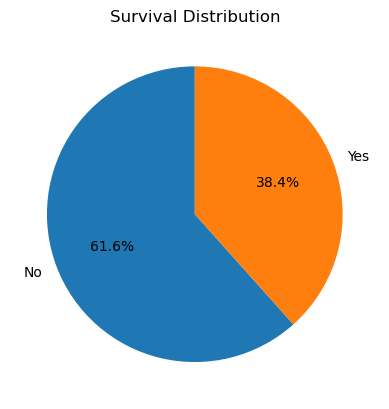

In [20]:
# Assuming 'Yes' corresponds to survivors and 'No' to non-survivors
survived_counts = data['Survived_Label'].value_counts()

# Plot a pie chart for the survival distribution
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title for the plot
plt.title("Survival Distribution")

# Display the pie chart
plt.show()

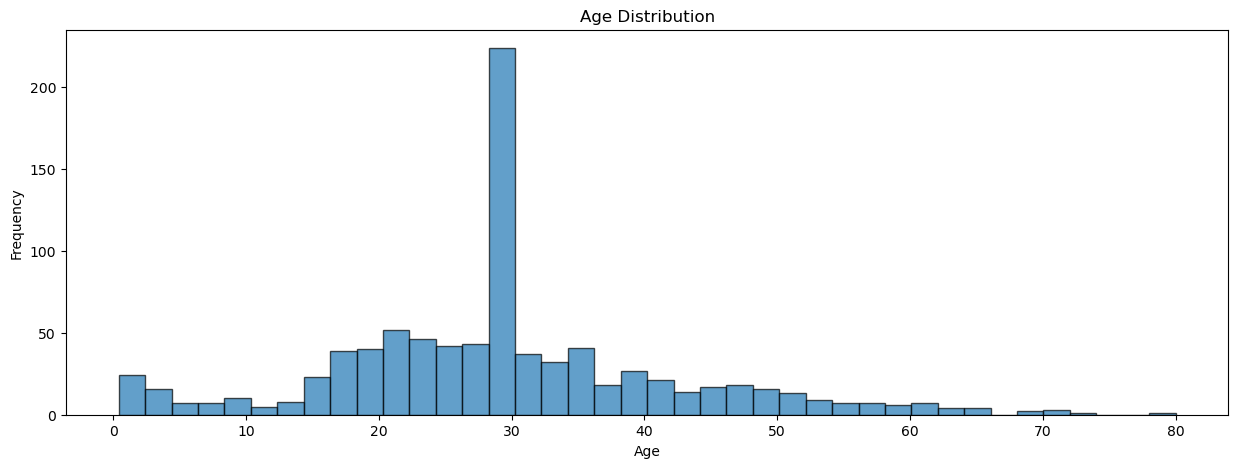

In [21]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Create a histogram for the 'Age' column with 40 bins, transparency, and edge color
plt.hist(data['Age'], bins=40, alpha=0.7, edgecolor='black')

# Set the title of the plot
plt.title('Age Distribution')

# Set labels for the x and y axes
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

Most people who were in Titanic were between 20 and 30.

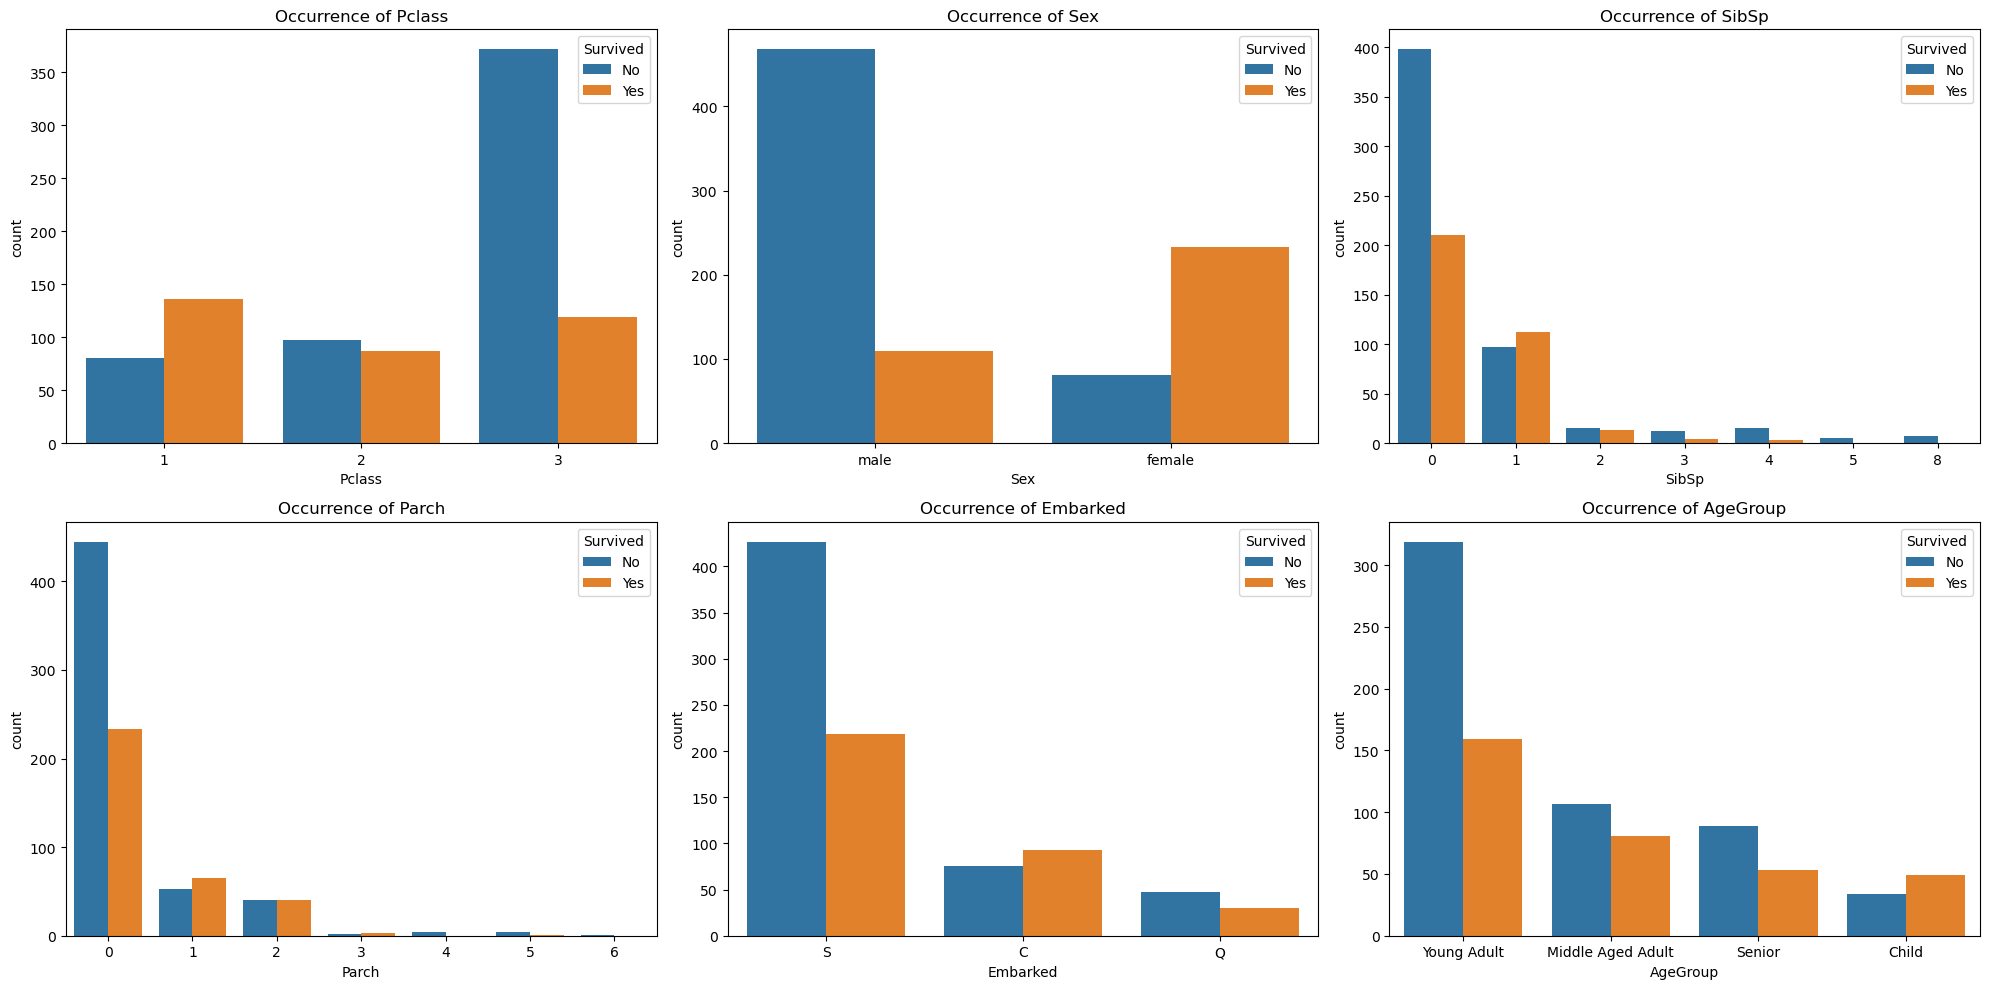

In [22]:
# Get the number of columns in the DataFrame
num_cols = len(columns)

# Calculate the number of rows needed based on 3 columns per row
num_rows = (num_cols - 1) // 3 + 1

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))
axes = axes.flatten()

# Loop through the specified columns and create count plots
for i, col in enumerate(columns):
    # Create a count plot with 'Survived' as hue
    sns.countplot(x=col, data=data, hue="Survived", ax=axes[i], hue_order=[0, 1])
    
    # Set the title for each subplot
    axes[i].set_title(f"Occurrence of {col}")
    
    # Add legend to each subplot
    axes[i].legend(loc='upper right', labels=['No', 'Yes'], title='Survived')

# Adjust layout for better visualization
plt.tight_layout()

# Display the subplots
plt.show()

## Dashboard

In [23]:
# Assuming 'data' and 'survived_values' are defined somewhere

def update_plots(survived):
    # Check if the selected state is "All People"
    if survived == "All People":
        filtered_data = data
    else:
        filtered_data = data[data['Survived_Label'] == survived]
    
    # Create a 3x3 grid for subplots
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1])

    # Update each plot
    ax0 = plt.subplot(gs[0, 0])
    sns.countplot(x="Pclass", data=filtered_data, ax=ax0)
    ax0.set_title('Pclass Distribution')

    ax1 = plt.subplot(gs[0, 1])
    sns.countplot(x="Sex", data=filtered_data, ax=ax1)
    ax1.set_title('Sex Distribution')

    ax2 = plt.subplot(gs[0, 2])
    sns.countplot(x="SibSp", data=filtered_data, ax=ax2)
    ax2.set_title('SibSp Distribution')

    ax3 = plt.subplot(gs[1, 0])
    sns.countplot(x="Parch", data=filtered_data, ax=ax3)
    ax3.set_title('Parch Distribution')

    ax4 = plt.subplot(gs[1, 1])
    sns.countplot(x="Embarked", data=filtered_data, ax=ax4)
    ax4.set_title('Embarked Distribution')
    
    ax5 = plt.subplot(gs[1, 2])
    sns.countplot(x="AgeGroup", data=filtered_data, ax=ax5)
    ax5.set_title('AgeGroup Distribution')
    
    ax6 = plt.subplot(gs[2, 2])
    plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)
    ax6.set_title("Survival Distribution")

    # Specify the size for the last subplot
    # The last subplot spans the entire third column
    ax7 = plt.subplot(gs[2, 0:2])
    ax7.hist(filtered_data['Age'], bins=40, alpha=0.7, edgecolor='black')
    ax7.set_title('Age Distribution')
    ax7.set_xlabel('Age')
    ax7.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


# Filter out rows with missing values in the 'Survived_Label' column
valid_survived_values = data['Survived_Label'].dropna().unique()

# Get the unique Survived values from the DataFrame without missing values
survived_values = ['All People'] + list(valid_survived_values)

# Your dropdown creation...
# Create a dropdown widget to choose the Survived value
people_dropdown = widgets.Dropdown(
    options=survived_values,
    description='Survived:',
    disabled=False
)

# Create the interactive widget with the update_plots function
interactive_plot = widgets.interactive(update_plots, survived=people_dropdown)

# Display the interactive widget
dashboard_layout = widgets.VBox([interactive_plot])
dashboard_layout

## Classification

### Dummies 

In [24]:
# Create dummy variables for the 'Sex' column
sex = pd.get_dummies(data["Sex"], drop_first=True)

# Create dummy variables for the 'Embarked' column
embark = pd.get_dummies(data["Embarked"], drop_first=True)

# Create dummy variables for the 'AgeGroup' column
agegroup = pd.get_dummies(data["AgeGroup"], drop_first=True)

# Create dummy variables for the 'Survived_Label' column
surv = pd.get_dummies(data["Survived_Label"], drop_first=True)

In [25]:
# Drop specified columns from the original dataset
data2 = data.drop(["Sex", 'Name', 'Ticket', 'Embarked', 'Survived', 'AgeGroup', "Survived_Label", "PassengerId"], axis=1)

# Create dummy variables for 'Sex', 'Embarked', 'AgeGroup', and 'Survived_Label'
data2 = pd.concat([data2, sex, embark, agegroup, surv], axis=1)

# Rename the 'Yes' column to 'Survived'
data2.rename(columns={'Yes': 'Survived'}, inplace=True)

# Display the first few rows of the updated dataset
data2.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Middle Aged Adult,Senior,Young Adult,Survived
0,3,22.00,1,0,7.25,1,0,1,0,0,1,0
1,1,38.00,1,0,71.28,0,0,0,1,0,0,1
2,3,26.00,0,0,7.92,0,0,1,0,0,1,1
3,1,35.00,1,0,53.10,0,0,1,1,0,0,1
4,3,35.00,0,0,8.05,1,0,1,1,0,0,0


In [26]:
data2.tail()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Middle Aged Adult,Senior,Young Adult,Survived
886,2,27.00,0,0,13.00,1,0,1,0,0,1,0
887,1,19.00,0,0,30.00,0,0,1,0,0,1,1
888,3,29.00,1,2,23.45,0,0,1,0,0,1,0
889,1,26.00,0,0,30.00,1,0,0,0,0,1,1
890,3,32.00,0,0,7.75,1,1,0,1,0,0,0


### Logistic Regression

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(["Survived"], axis=1),  # Features (independent variables)
    data2["Survived"],  # Target variable (dependent variable)
    test_size=0.3,  # Size of the testing set (30% in this case)
    random_state=101  # Random seed for reproducibility
)

In [28]:
# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
pred = logreg.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy = logreg.score(X_test, y_test)

# Display the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.7835820895522388


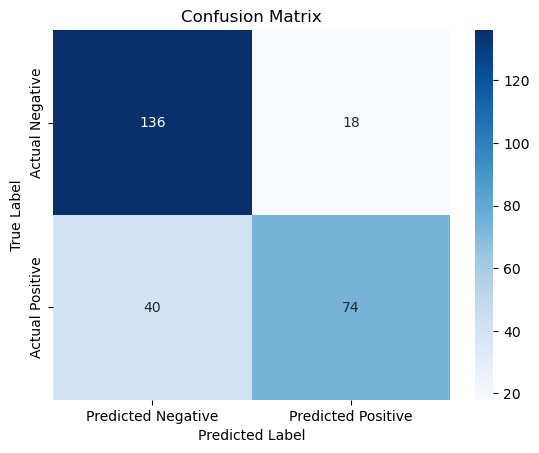

In [29]:
# Assuming pred is your model's predictions on the test set
conf_matrix = confusion_matrix(y_test, pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Print the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [31]:
# Define the number of folds for cross-validation
k_fold = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cross_val_scores = cross_val_score(logreg, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation scores:", cross_val_scores)

# Print the average accuracy across all folds
print("Average accuracy:", cross_val_scores.mean())

Cross-validation scores: [0.81730769 0.80769231 0.80193237]
Average accuracy: 0.8089774557165862


### Decision Tree Classifier

In [32]:
# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Train the model using the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
pred = dtc.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy = dtc.score(X_test, y_test)

# Display the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.753731343283582


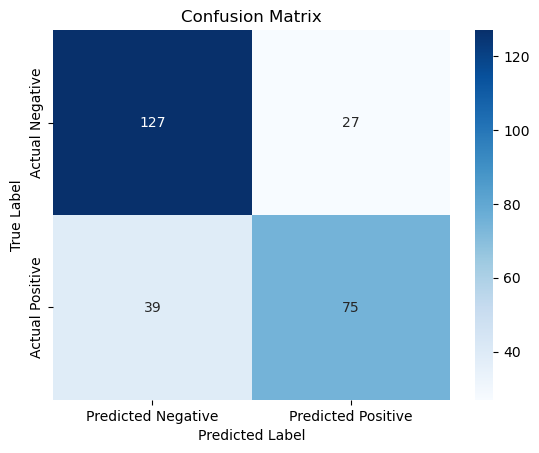

In [33]:
# Assuming pred is your model's predictions on the test set
conf_matrix = confusion_matrix(y_test, pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Print the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       154
           1       0.74      0.66      0.69       114

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [35]:
# Define the number of folds for cross-validation
k_fold = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cross_val_scores = cross_val_score(dtc, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation scores:", cross_val_scores)

# Print the average accuracy across all folds
print("Average accuracy:", cross_val_scores.mean())

Cross-validation scores: [0.77884615 0.77403846 0.75362319]
Average accuracy: 0.7688359345968042


### Random Forest

In [36]:
# Create a Random Forest Classifier with 500 estimators
rfc = RandomForestClassifier(n_estimators=500)

# Train the model using the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
pred = rfc.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy = rfc.score(X_test, y_test)

# Display the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.8097014925373134


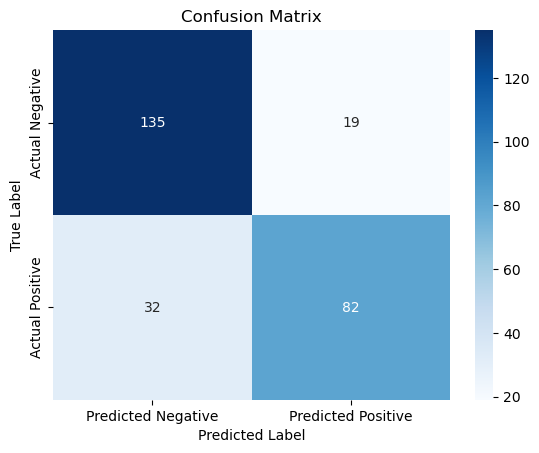

In [37]:
# Assuming pred is your model's predictions on the test set
conf_matrix = confusion_matrix(y_test, pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Print the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       154
           1       0.81      0.72      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [39]:
# Define the number of folds for cross-validation
k_fold = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cross_val_scores = cross_val_score(rfc, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation scores:", cross_val_scores)

# Print the average accuracy across all folds
print("Average accuracy:", cross_val_scores.mean())

Cross-validation scores: [0.82211538 0.8125     0.84541063]
Average accuracy: 0.8266753375449026


### XGBoosts Classifier

In [40]:
# Create an XGBoost Classifier with 1000 estimators
xgb = XGBClassifier(n_estimators=1000)

# Train the model using the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
pred = xgb.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy = xgb.score(X_test, y_test)

# Display the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.7910447761194029


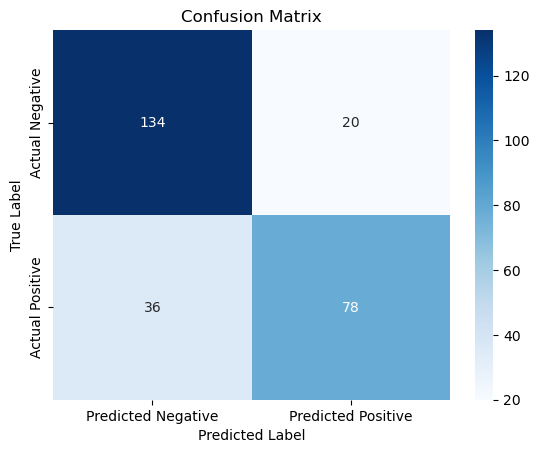

In [41]:
# Assuming pred is your model's predictions on the test set
conf_matrix = confusion_matrix(y_test, pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Print the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       154
           1       0.80      0.68      0.74       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [43]:
# Define the number of folds for cross-validation
k_fold = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cross_val_scores = cross_val_score(xgb, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation scores:", cross_val_scores)

# Print the average accuracy across all folds
print("Average accuracy:", cross_val_scores.mean())

Cross-validation scores: [0.78365385 0.77884615 0.78743961]
Average accuracy: 0.7833132045088567


### ANN

In [44]:
# Creating a Sequential model for the artificial neural network
ann = Sequential()

# Adding the input layer with 32 units, 'relu' activation function, and input dimension of 11
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=11))

# Adding a hidden layer with 32 units and 'relu' activation function
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))

# Adding the output layer with 1 unit, 'sigmoid' activation function for binary classification
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the model with 'adam' optimizer, 'mean_squared_error' loss, and 'accuracy' as a metric
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [45]:
# Training the artificial neural network on the training data
ann.fit(X_train, y_train, batch_size=32, epochs=300, verbose=1)

Epoch 1/300
20/20 [==============================] - 1s 2ms/step - loss: 0.2451 - accuracy: 0.6854
Epoch 2/300
20/20 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.6790
Epoch 3/300
20/20 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.6806
Epoch 4/300
20/20 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.6822
Epoch 5/300
20/20 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.6870
Epoch 6/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.7030
Epoch 7/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.7030
Epoch 8/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.7175
Epoch 9/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.7159
Epoch 10/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.7159
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.8218
Epoch 84/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.8250
Epoch 85/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1309 - accuracy: 0.8186
Epoch 86/300
20/20 [==============================] - 0s 4ms/step - loss: 0.1277 - accuracy: 0.8234
Epoch 87/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.8250
Epoch 88/300
20/20 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.8266
Epoch 89/300
20/20 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 0.8138
Epoch 90/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.8122
Epoch 91/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1309 - accuracy: 0.8315
Epoch 92/300
20/20 [==============================] - 0s 4ms/step - loss: 0.1273 - accuracy: 0.8299
Epoch 93/300


20/20 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.8379
Epoch 165/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.8363
Epoch 166/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.8283
Epoch 167/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.8363
Epoch 168/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.8299
Epoch 169/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.8315
Epoch 170/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1217 - accuracy: 0.8411
Epoch 171/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.8411
Epoch 172/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.8299
Epoch 173/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.8299
Epoc

20/20 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.8363
Epoch 246/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.8459
Epoch 247/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.8507
Epoch 248/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.8491
Epoch 249/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.8443
Epoch 250/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.8475
Epoch 251/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.8475
Epoch 252/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.8475
Epoch 253/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.8459
Epoch 254/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.8475
Epoc

In [46]:
# Making predictions using the trained artificial neural network on the test data
pred = ann.predict(X_test)

# Converting predicted probabilities to binary values (1 or 0) using a threshold of 0.5
pred = [1 if y >= 0.5 else 0 for y in pred]

# Printing the predicted values
print(pred)

9/9 [==============================] - 0s 2ms/step
[0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]


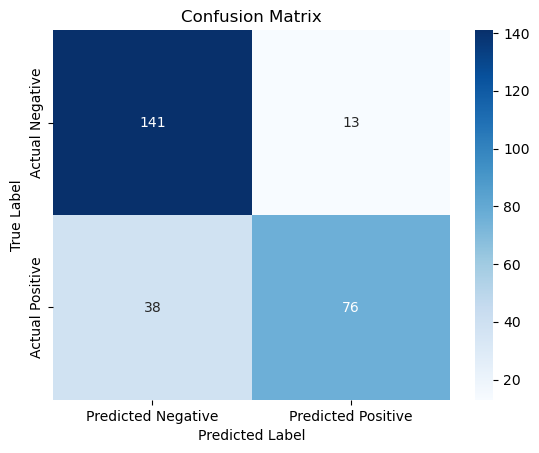

In [47]:
# Assuming pred is your model's predictions on the test set
conf_matrix = confusion_matrix(y_test, pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Printing a classification report to evaluate the model performance on the test data
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       154
           1       0.85      0.67      0.75       114

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



In [49]:
# Evaluating the performance of the artificial neural network on the test data
score = ann.evaluate(X_test, y_test, verbose=1)

# Printing the test loss
print(f"Test Loss: {score[0]:.4f}")

# Printing the test accuracy as a percentage
print(f"Test Accuracy: {score[1]*100:.2f}%")

9/9 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.8097
Test Loss: 0.1377
Test Accuracy: 80.97%
